In [1]:
#https://ieeexplore.ieee.org/document/10549889

In [2]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import keras.models
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

2024-11-13 14:52:25.862247: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9360] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-13 14:52:25.862343: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-13 14:52:25.862390: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1537] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-13 14:52:25.872677: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Load datasets
ppg_data_combined = pd.read_excel('combined_dataset.xlsx')

ppg_data_combined['Sex(M/F)'] = ppg_data_combined['Sex(M/F)'].map({'Male': 1, 'Female': 0})

print(ppg_data_combined)

     Num.  subject_ID  Sex(M/F)  Age(year)  Height(cm)  Weight(kg)  \
0       1           2         0         45         152          63   
1       1           2         0         45         152          63   
2       1           2         0         45         152          63   
3       2           3         0         50         157          50   
4       2           3         0         50         157          50   
..    ...         ...       ...        ...         ...         ...   
652   218         418         1         25         173          63   
653   218         418         1         25         173          63   
654   219         419         1         24         175          58   
655   219         419         1         24         175          58   
656   219         419         1         24         175          58   

     Systolic Blood Pressure(mmHg)  Diastolic Blood Pressure(mmHg)  \
0                              161                              89   
1                  

In [5]:
# 참가자의 숫자 확인
print(ppg_data_combined['subject_ID'].nunique())

219


The dataset provided by Liang et al. in their study is a valuable resource for non-invasive CVD detection, encompassing 657 data segments from 219 individuals.

In [6]:
data_systolic = ppg_data_combined["Systolic Blood Pressure(mmHg)"]
data_diastolic = ppg_data_combined["Diastolic Blood Pressure(mmHg)"]
data_sex = ppg_data_combined["Sex(M/F)"]
data_age = ppg_data_combined["Age(year)"]
data_height = ppg_data_combined["Height(cm)"]
data_weight = ppg_data_combined["Weight(kg)"]
data_hr = ppg_data_combined["Heart Rate(b/m)"]
data_bmi = ppg_data_combined["BMI(kg/m^2)"]

ppg_data = ppg_data_combined.iloc[:,14:]

data_personal = pd.concat([data_sex, data_age, data_height, data_weight, data_hr, data_bmi], axis=1)

In [7]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to your data
scaler.fit(data_personal)

# Transform the data
normalized_data = scaler.transform(data_personal)

In [8]:
# Convert back to a DataFrame (optional, if you need the result as a DataFrame)
normalized_df = pd.DataFrame(normalized_data, columns=data_personal.columns)

ppg_data = np.array(ppg_data)
data_personal = np.array(normalized_df)
print(ppg_data)
print(data_personal)

[[2438 2438 2438 ... 1827 1754 1754]
 [2201 2201 2171 ... 1997 1997 1997]
 [2019 2014 2014 ... 1924 1929 1929]
 ...
 [3083 3039 3071 ... 2422 2451 2379]
 [2426 2431 2446 ... 3103 3146 3151]
 [2691 2718 2743 ... 2611 2639 2623]]
[[0.         0.36923077 0.1372549  0.40298507 0.83333333 0.55232326]
 [0.         0.36923077 0.1372549  0.40298507 0.83333333 0.55232326]
 [0.         0.36923077 0.1372549  0.40298507 0.83333333 0.55232326]
 ...
 [1.         0.04615385 0.58823529 0.32835821 0.24074074 0.18650234]
 [1.         0.04615385 0.58823529 0.32835821 0.24074074 0.18650234]
 [1.         0.04615385 0.58823529 0.32835821 0.24074074 0.18650234]]


In [9]:
# Assuming bp_data has columns 'systolic' and 'diastolic'
# Normalize blood pressure data
bp_data = np.array([data_systolic, data_diastolic]).T
print(bp_data)

[[161  89]
 [161  89]
 [161  89]
 ...
 [108  68]
 [108  68]
 [108  68]]


In [10]:
# Split the data into training and testing sets
X_train2100, X_test2100, y_train, y_test = train_test_split(ppg_data, bp_data, test_size=0.15, random_state=42)
X_train6, X_test6, y_train, y_test = train_test_split(data_personal, bp_data, test_size=0.15, random_state=42)

In [11]:
# # Reshape input to be [samples, time steps, features]
# X_train2100 = np.reshape(X_train2100, (X_train2100.shape[0], 1, X_train2100.shape[1]))
# X_test2100 = np.reshape(X_test2100, (X_test2100.shape[0], 1, X_test2100.shape[1]))

In [12]:
# # Reshape input to be [samples, time steps, features]
# X_train6 = np.reshape(X_train6, (X_train6.shape[0], 1, X_train6.shape[1]))
# X_test6 = np.reshape(X_test6, (X_test6.shape[0], 1, X_test6.shape[1]))

In [13]:
# PPG Signal (2100, 1)으로 변환
X_train2100 = np.reshape(X_train2100, (X_train2100.shape[0], X_train2100.shape[1], 1))
X_test2100 = np.reshape(X_test2100, (X_test2100.shape[0], X_test2100.shape[1], 1))

In [14]:
# Personal Data (6, 1)으로 변환
X_train6 = np.reshape(X_train6, (X_train6.shape[0], X_train6.shape[1], 1))
X_test6 = np.reshape(X_test6, (X_test6.shape[0], X_test6.shape[1], 1))

In [15]:
print(X_test2100.shape)
print(X_test6.shape)

(99, 2100, 1)
(99, 6, 1)


In [16]:
'''
final_model = keras.models.load_model("model_v3.h5")
'''

'\nfinal_model = keras.models.load_model("model_v3.h5")\n'

In [17]:
'''
predicted_bp = final_model.predict([X_test6, X_test2100])
print(predicted_bp)
'''

'\npredicted_bp = final_model.predict([X_test6, X_test2100])\nprint(predicted_bp)\n'

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense, Concatenate
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 첫 번째 입력: Personal Data (6, 1)
input1 = Input(shape=(6, 1), name='Input1')
x1 = GRU(32, return_sequences=True, activation='relu')(input1)
x1 = GRU(32, return_sequences=True, activation='relu')(x1)
x1 = GRU(32, return_sequences=True, activation='relu')(x1)
x1 = GRU(32, return_sequences=True, activation='relu')(x1)
x1 = GRU(32, activation='relu')(x1)

# 두 번째 입력: PPG Signal (2100, 1)
input2 = Input(shape=(2100, 1), name='Input2')
x2 = GRU(64, return_sequences=True, activation='relu')(input2)
x2 = GRU(64, return_sequences=True, activation='relu')(x2)
x2 = GRU(64, activation='relu')(x2)

# 두 경로를 병합 (Concatenation)
merged = Concatenate()([x1, x2])

# Dense layers
x = Dense(64, activation='relu')(merged)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = Dense(8, activation='relu')(x)

# SBP와 DBP 예측 후 결합하여 반환 (선형 활성화 함수 사용)
output = Dense(2, activation='linear', name='BP')(x)

# 모델 정의
model = Model(inputs=[input1, input2], outputs=output)

# Adamax 옵티마이저 사용, 학습률 0.005로 설정
optimizer = Adamax(learning_rate=0.005)

# 모델 컴파일: 손실 함수로 MSE 사용
model.compile(optimizer=optimizer, loss='mse')

# 모델 요약 출력
model.summary()

2024-11-13 14:52:48.820008: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1883] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38698 MB memory:  -> device: 0, name: CUDA GPU, pci bus id: 0000:4c:00.0, compute capability: 8.0
2024-11-13 14:52:48.822275: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1883] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38698 MB memory:  -> device: 1, name: CUDA GPU, pci bus id: 0000:c8:00.0, compute capability: 8.0


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Input1 (InputLayer)         [(None, 6, 1)]               0         []                            
                                                                                                  
 gru (GRU)                   (None, 6, 32)                3360      ['Input1[0][0]']              
                                                                                                  
 gru_1 (GRU)                 (None, 6, 32)                6336      ['gru[0][0]']                 
                                                                                                  
 Input2 (InputLayer)         [(None, 2100, 1)]            0         []                            
                                                                                              

In [19]:
# 콜백 함수 설정: 조기 종료(EarlyStopping) 및 최적 가중치 저장(ModelCheckpoint)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

In [20]:
# 모델 훈련
history = model.fit(
    [X_train6, X_train2100], y_train,  # 훈련 데이터
    epochs=500,  # 총 500 에포크
    batch_size=128,  # 배치 크기 128
    validation_split=0.25,  # 훈련 데이터의 20%를 검증 데이터로 사용
#     callbacks=[early_stopping, model_checkpoint]  # 콜백 함수 사용
    callbacks=[early_stopping]
)

Epoch 1/500


2024-11-13 14:53:00.837377: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5612d16143a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-11-13 14:53:00.837424: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): CUDA GPU, Compute Capability 8.0
2024-11-13 14:53:00.837432: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): CUDA GPU, Compute Capability 8.0
2024-11-13 14:53:00.841740: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-13 14:53:00.892865: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907
2024-11-13 14:53:00.958896: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4/4 [==============================] - 53s 11s/step - loss: 6889.3613 - val_loss: 1686.1373
Epoch 2/500
4/4 [==============================] - 42s 11s/step - loss: 1820.6722 - val_loss: 1158.6273
Epoch 3/500
4/4 [==============================] - 44s 11s/step - loss: 830.6334 - val_loss: 1139.5757
Epoch 4/500
4/4 [==============================] - 43s 11s/step - loss: 967.6871 - val_loss: 708.9077
Epoch 5/500
4/4 [==============================] - 43s 11s/step - loss: 625.2145 - val_loss: 675.6564
Epoch 6/500
4/4 [==============================] - 42s 11s/step - loss: 599.3674 - val_loss: 591.9562
Epoch 7/500
4/4 [==============================] - 43s 11s/step - loss: 560.8715 - val_loss: 645.9988
Epoch 8/500
4/4 [==============================] - 43s 11s/step - loss: 534.8193 - val_loss: 567.0739
Epoch 9/500
4/4 [==============================] - 42s 11s/step - loss: 517.7793 - val_loss: 569.4967
Epoch 10/500
4/4 [==============================] - 43s 11s/step - loss: 521.4723 - val_l

4/4 [==============================] - 47s 12s/step - loss: 242.9347 - val_loss: 246.3904
Epoch 81/500
4/4 [==============================] - 47s 12s/step - loss: 239.9748 - val_loss: 231.6465
Epoch 82/500
4/4 [==============================] - 47s 12s/step - loss: 237.7498 - val_loss: 255.0393
Epoch 83/500
4/4 [==============================] - 47s 12s/step - loss: 241.3950 - val_loss: 229.6420
Epoch 84/500
4/4 [==============================] - 47s 12s/step - loss: 248.2691 - val_loss: 227.9033
Epoch 85/500
4/4 [==============================] - 47s 12s/step - loss: 237.5503 - val_loss: 256.0873
Epoch 86/500
4/4 [==============================] - 48s 12s/step - loss: 244.1678 - val_loss: 228.3896
Epoch 87/500
4/4 [==============================] - 44s 11s/step - loss: 248.3084 - val_loss: 227.5266
Epoch 88/500
4/4 [==============================] - 47s 12s/step - loss: 233.3577 - val_loss: 229.2857
Epoch 89/500
4/4 [==============================] - 48s 12s/step - loss: 229.8872 - va

In [21]:
predicted_bp = model.predict([X_test6, X_test2100])
print(predicted_bp)

4/4 [==============================] - 7s 1s/step
[[114.244484  58.556156]
 [131.5091    74.64326 ]
 [124.52059   70.49853 ]
 [135.88643   77.10561 ]
 [132.97702   75.29546 ]
 [123.75472   68.72151 ]
 [124.18257   68.73812 ]
 [142.18523   81.12734 ]
 [129.14508   72.47893 ]
 [130.98256   73.4957  ]
 [130.90677   72.67171 ]
 [124.98029   71.14252 ]
 [115.479256  64.65923 ]
 [121.015045  68.198265]
 [134.61266   74.3717  ]
 [137.13286   78.53177 ]
 [132.00092   73.82443 ]
 [133.27602   75.57935 ]
 [124.88856   69.55442 ]
 [118.97013   66.19504 ]
 [114.881676  63.40092 ]
 [135.21063   76.96186 ]
 [128.20778   72.780846]
 [133.36156   75.41227 ]
 [124.6882    70.61082 ]
 [131.68222   74.9999  ]
 [123.429115  69.16814 ]
 [134.66373   76.65687 ]
 [129.63962   72.26697 ]
 [128.44348   72.32409 ]
 [130.21771   73.380035]
 [118.83846   65.54004 ]
 [128.17152   72.570435]
 [128.7408    72.25669 ]
 [120.743515  66.441795]
 [141.07237   79.10289 ]
 [129.93997   73.34648 ]
 [134.76237   76.15393 ]


In [22]:
# Systolic values
y_test_systolic = y_test[:, 0]
predicted_systolic = predicted_bp[:, 0]

In [23]:
# Diastolic values
y_test_diastolic = y_test[:, 1]
predicted_diastolic = predicted_bp[:, 1]

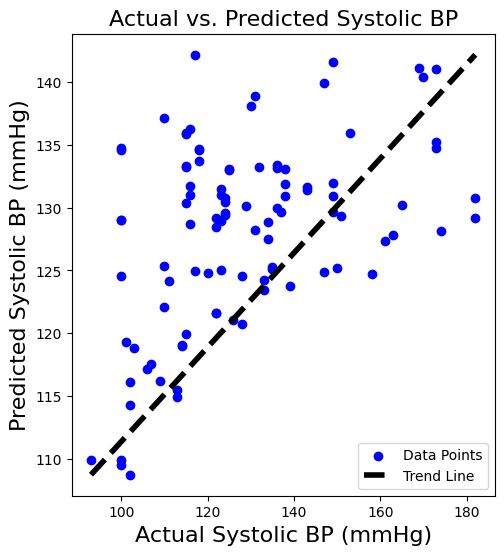

In [24]:
# Plotting actual vs. predicted Systolic Blood Pressure
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test_systolic, predicted_systolic, label='Data Points', color='blue')
plt.plot([y_test_systolic.min(), y_test_systolic.max()], [predicted_systolic.min(), predicted_systolic.max()], 'k--', lw=4, label='Trend Line')
plt.xlabel('Actual Systolic BP (mmHg)', fontsize=16)
plt.ylabel('Predicted Systolic BP (mmHg)', fontsize=16)
plt.title('Actual vs. Predicted Systolic BP', fontsize=16)
plt.legend()

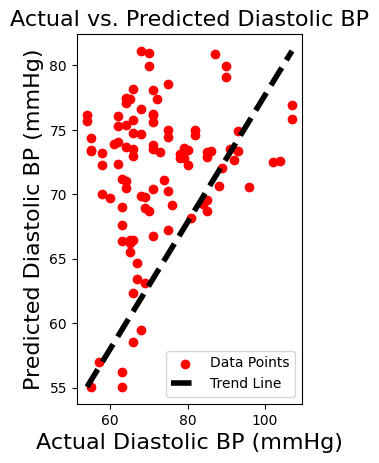

In [25]:
# Plotting actual vs. predicted Diastolic Blood Pressure
plt.subplot(1, 2, 2)
plt.scatter(y_test_diastolic, predicted_diastolic, label='Data Points', color='red')
plt.plot([y_test_diastolic.min(), y_test_diastolic.max()], [predicted_diastolic.min(), predicted_diastolic.max()], 'k--', lw=4, label='Trend Line')
plt.xlabel('Actual Diastolic BP (mmHg)', fontsize=16)
plt.ylabel('Predicted Diastolic BP (mmHg)', fontsize=16)
plt.title('Actual vs. Predicted Diastolic BP', fontsize=16)
plt.legend()

In [26]:
plt.tight_layout()
plt.savefig('PPG/SBP-DBP-prediction.png', dpi=300)
plt.show()

<Figure size 640x480 with 0 Axes>

In [27]:
# Bland-Altman Plot for Systolic Blood Pressure
mean_systolic = np.mean([y_test_systolic, predicted_systolic], axis=0)
diff_systolic = y_test_systolic - predicted_systolic
mean_diff_systolic = np.mean(diff_systolic)
std_diff_systolic = np.std(diff_systolic)
upper_limit_systolic = mean_diff_systolic + 1.96 * std_diff_systolic
lower_limit_systolic = mean_diff_systolic - 1.96 * std_diff_systolic

# Bland-Altman Plot for Diastolic Blood Pressure
mean_diastolic = np.mean([y_test_diastolic, predicted_diastolic], axis=0)
diff_diastolic = y_test_diastolic - predicted_diastolic
mean_diff_diastolic = np.mean(diff_diastolic)
std_diff_diastolic = np.std(diff_diastolic)
upper_limit_diastolic = mean_diff_diastolic + 1.96 * std_diff_diastolic
lower_limit_diastolic = mean_diff_diastolic - 1.96 * std_diff_diastolic

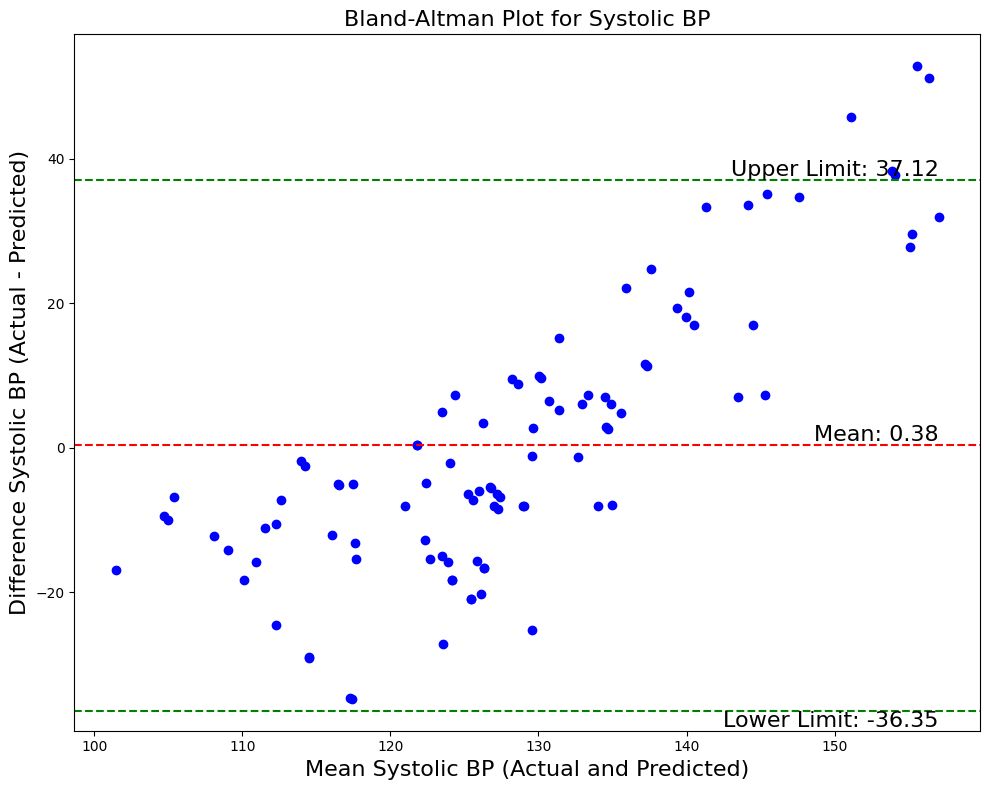

In [28]:
plt.figure(figsize=(10, 8))
# Systolic Bland-Altman Plot
# plt.subplot(1, 2, 1)
plt.scatter(mean_systolic, diff_systolic, color='blue')
plt.axhline(mean_diff_systolic, color='red', linestyle='--')
plt.axhline(mean_diff_systolic + 1.96 * std_diff_systolic, color='green', linestyle='--')
plt.axhline(mean_diff_systolic - 1.96 * std_diff_systolic, color='green', linestyle='--')
plt.text(x=max(mean_systolic), y=mean_diff_systolic, s=f'Mean: {mean_diff_systolic:.2f}', va='bottom', ha='right', fontsize=16)
plt.text(x=max(mean_systolic), y=upper_limit_systolic, s=f'Upper Limit: {upper_limit_systolic:.2f}', va='bottom', ha='right', fontsize=16)
plt.text(x=max(mean_systolic), y=lower_limit_systolic, s=f'Lower Limit: {lower_limit_systolic:.2f}', va='top', ha='right', fontsize=16)
plt.xlabel('Mean Systolic BP (Actual and Predicted)', fontsize=16)
plt.ylabel('Difference Systolic BP (Actual - Predicted)', fontsize=16)
plt.title('Bland-Altman Plot for Systolic BP', fontsize=16)
plt.tight_layout()
plt.savefig('PPG/Bland-Altman-Plot-SBP.png', dpi=300)
plt.show()

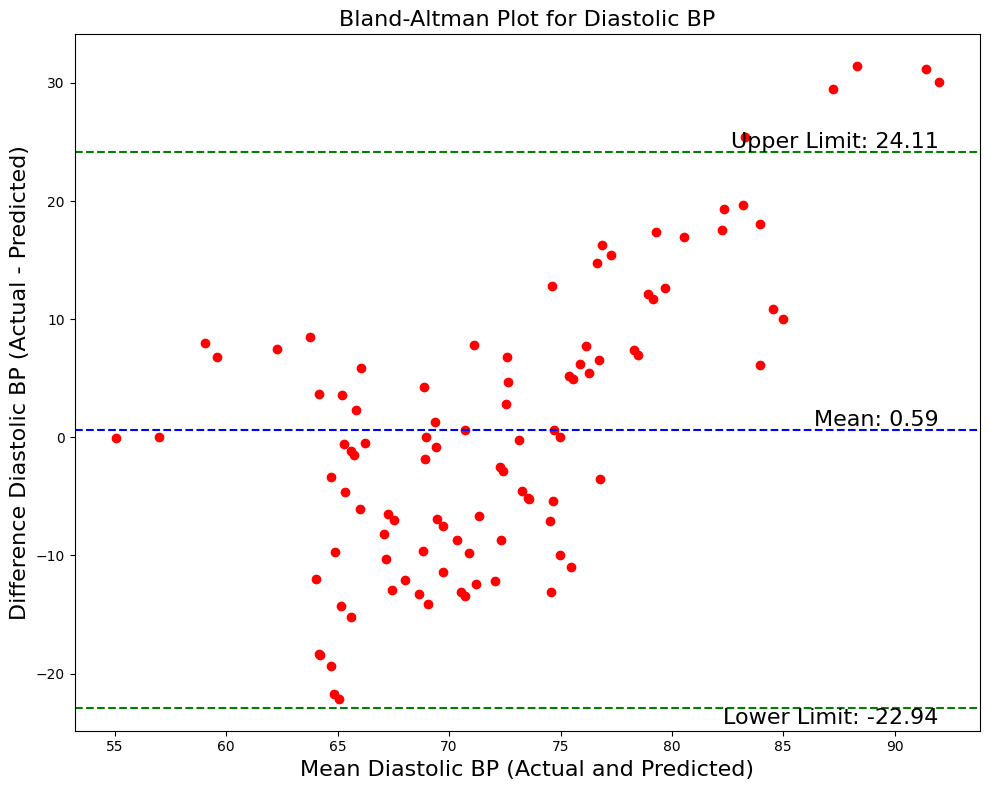

In [29]:
# Diastolic Bland-Altman Plot
plt.figure(figsize=(10, 8))
# plt.subplot(1, 2, 2)
plt.scatter(mean_diastolic, diff_diastolic, color='red')
plt.axhline(mean_diff_diastolic, color='blue', linestyle='--')
plt.axhline(mean_diff_diastolic + 1.96 * std_diff_diastolic, color='green', linestyle='--')
plt.axhline(mean_diff_diastolic - 1.96 * std_diff_diastolic, color='green', linestyle='--')
plt.text(x=max(mean_diastolic), y=mean_diff_diastolic, s=f'Mean: {mean_diff_diastolic:.2f}', va='bottom', ha='right', fontsize=16)
plt.text(x=max(mean_diastolic), y=upper_limit_diastolic, s=f'Upper Limit: {upper_limit_diastolic:.2f}', va='bottom', ha='right', fontsize=16)
plt.text(x=max(mean_diastolic), y=lower_limit_diastolic, s=f'Lower Limit: {lower_limit_diastolic:.2f}', va='top', ha='right', fontsize=16)
plt.xlabel('Mean Diastolic BP (Actual and Predicted)', fontsize=16)
plt.ylabel('Difference Diastolic BP (Actual - Predicted)', fontsize=16)
plt.title('Bland-Altman Plot for Diastolic BP', fontsize=16)

plt.tight_layout()
plt.savefig('PPG/Bland-Altman-Plot-DBP.png', dpi=300)
plt.show()

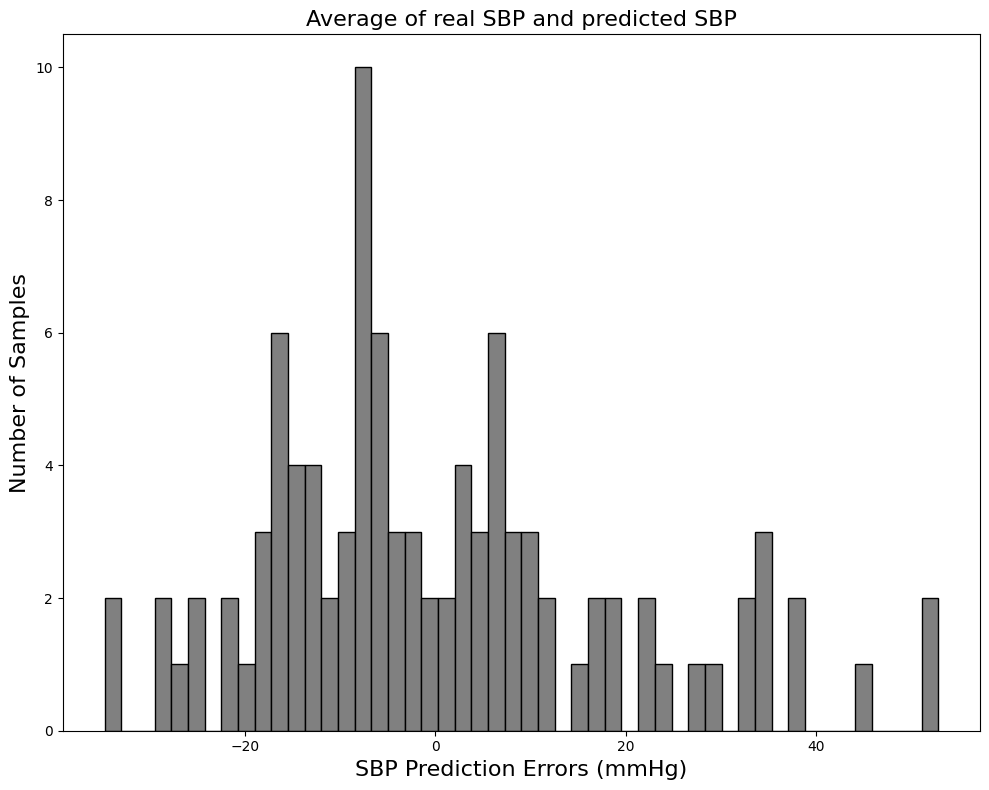

In [30]:
# Calculate prediction errors
errors_systolic = y_test_systolic - predicted_systolic
errors_diastolic = y_test_diastolic - predicted_diastolic

# Create histograms
plt.figure(figsize=(10, 8))

# Histogram for Systolic Blood Pressure Errors
# plt.subplot(1, 2, 1)
plt.hist(errors_systolic, bins=50, color='gray', edgecolor='black')
plt.xlabel('SBP Prediction Errors (mmHg)', fontsize=16)
plt.ylabel('Number of Samples', fontsize=16)
plt.title('Average of real SBP and predicted SBP', fontsize=16)
plt.tight_layout()
plt.savefig('PPG/Prediction-errors-SBP.png', dpi=300)
plt.show()

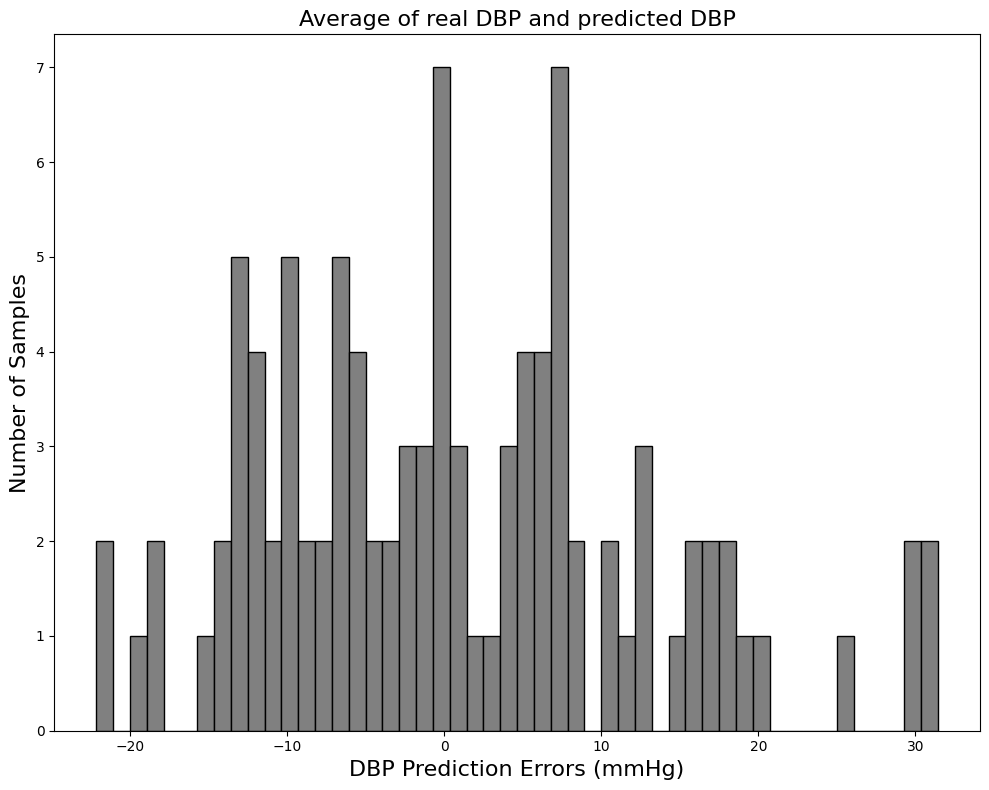

In [31]:
# Histogram for Diastolic Blood Pressure Errors
plt.figure(figsize=(10, 8))
# plt.subplot(1, 2, 2)
plt.hist(errors_diastolic, bins=50, color='gray', edgecolor='black')
plt.xlabel('DBP Prediction Errors (mmHg)', fontsize=16)
plt.ylabel('Number of Samples', fontsize=16)
plt.title('Average of real DBP and predicted DBP', fontsize=16)

plt.tight_layout()
plt.savefig('PPG/Prediction-errors-DBP.png', dpi=300)
plt.show()

In [32]:
# Calculate MAE
mae_systolic = np.mean(np.abs(errors_systolic))
mae_diastolic = np.mean(np.abs(errors_diastolic))

# Calculate MAPD
mapd_systolic = np.mean(np.abs(errors_systolic / y_test_systolic)) * 100
mapd_diastolic = np.mean(np.abs(errors_diastolic / y_test_diastolic)) * 100

# Calculate Cumulative Percentages (CP)
cp_systolic_5 = np.mean(np.abs(errors_systolic) <= 5) * 100
cp_systolic_10 = np.mean(np.abs(errors_systolic) <= 10) * 100
cp_systolic_15 = np.mean(np.abs(errors_systolic) <= 15) * 100
cp_diastolic_5 = np.mean(np.abs(errors_diastolic) <= 5) * 100
cp_diastolic_10 = np.mean(np.abs(errors_diastolic) <= 10) * 100
cp_diastolic_15 = np.mean(np.abs(errors_diastolic) <= 15) * 100

# Calculate ME
me_systolic = np.mean(errors_systolic)
me_diastolic = np.mean(errors_diastolic)

# Calculate SD
sd_systolic = np.std(errors_systolic)
sd_diastolic = np.std(errors_diastolic)

In [33]:
# Printing results
print("Systolic BP:")
print(f"MAE: {mae_systolic:.3f} mmHg")
print(f"MAPD: {mapd_systolic:.3f}%")
print(f"CP within 5 mmHg: {cp_systolic_5:.3f}%")
print(f"CP within 10 mmHg: {cp_systolic_10:.3f}%")
print(f"CP within 15 mmHg: {cp_systolic_15:.3f}%")
print(f"ME: {me_systolic:.3f} mmHg")
print(f"SD: {sd_systolic:.3f} mmHg")

print("\nDiastolic BP:")
print(f"MAE: {mae_diastolic:.3f} mmHg")
print(f"MAPD: {mapd_diastolic:.3f}%")
print(f"CP within 5 mmHg: {cp_diastolic_5:.3f}%")
print(f"CP within 10 mmHg: {cp_diastolic_10:.3f}%")
print(f"CP within 15 mmHg: {cp_diastolic_15:.3f}%")
print(f"ME: {me_diastolic:.3f} mmHg")
print(f"SD: {sd_diastolic:.3f} mmHg")

Systolic BP:
MAE: 14.782 mmHg
MAPD: 11.340%
CP within 5 mmHg: 16.162%
CP within 10 mmHg: 48.485%
CP within 15 mmHg: 58.586%
ME: 0.383 mmHg
SD: 18.743 mmHg

Diastolic BP:
MAE: 9.615 mmHg
MAPD: 13.146%
CP within 5 mmHg: 27.273%
CP within 10 mmHg: 59.596%
CP within 15 mmHg: 80.808%
ME: 0.588 mmHg
SD: 12.003 mmHg
